Basic setup

In [1]:
import requests, sys, json

# Documentation: https://www.uniprot.org/help/api
WEBSITE_API = "https://rest.uniprot.org/"

# Documentation: https://www.ebi.ac.uk/proteins/api/doc/
PROTEINS_API = "https://www.ebi.ac.uk/proteins/api"

# Helper function to download data
def get_url(url, **kwargs):
  response = requests.get(url, **kwargs);

  if not response.ok:
    print(response.text)
    response.raise_for_status()
    sys.exit()

  return response

Basic search request

In [4]:
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=*")

data = r.json()

# print the number of results in the payload
n_results = len(data["results"])
print(f"Number of results: {n_results}\n")

# print all headers in the server response
for (key, value) in r.headers.items():
  print(f"{key}: {value}")

Number of results: 1

Vary: accept,accept-encoding,x-uniprot-release,x-api-deployment-date, User-Agent
Cache-Control: public, max-age=43200
x-cache: miss cached
Content-Type: application/json
Content-Encoding: gzip
Access-Control-Allow-Credentials: true
Access-Control-Expose-Headers: Link, X-Total-Results, X-UniProt-Release, X-UniProt-Release-Date, X-API-Deployment-Date
X-API-Deployment-Date: 05-February-2025
Strict-Transport-Security: max-age=31536000; includeSubDomains
Date: Thu, 27 Feb 2025 00:02:04 GMT
Access-Control-Max-Age: 1728000
X-UniProt-Release: 2025_01
X-Total-Results: 1
Transfer-Encoding: chunked
Access-Control-Allow-Origin: *
Accept-Ranges: bytes
Connection: keep-alive
Access-Control-Allow-Methods: GET, PUT, POST, DELETE, PATCH, OPTIONS
Access-Control-Allow-Headers: DNT,Keep-Alive,User-Agent,X-Requested-With,If-Modified-Since,Cache-Control,Content-Type,Range,Authorization
X-UniProt-Release-Date: 05-February-2025


Complex search request, paginated results

In [3]:
# Search for gene parkin, in human
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)")

data = r.json()

# get first page of results
total = r.headers.get("x-total-results")
page_total = len(data["results"])
print(f"total: {total}; page total: {page_total}")

print(r.headers["Link"])

# print(r.links["next"]["url"])

# while there are next pages, paginate through them
while r.links.get("next", {}).get("url"):
  r = get_url(r.links["next"]["url"])

  data = r.json()

  total = r.headers.get("x-total-results")
  page_total = len(data["results"])
  print(f"total: {total}; page total: {page_total}")


total: 145; page total: 25
<https://rest.uniprot.org/uniprotkb/search?query=parkin%20AND%20%28taxonomy_id%3A9606%29&cursor=1mkycb2xwxbouubhqci06lvfrzkh3a0lyvxs&size=25>; rel="next"
total: 145; page total: 25
total: 145; page total: 25
total: 145; page total: 25
total: 145; page total: 25
total: 145; page total: 20


Complex search request, stream

In [ ]:
# stream good for simplicity (no pagination), but...
#  - harder to follow progress
#  - harder to resume on failure
#  - not sorted by score
r = get_url(f"{WEBSITE_API}/uniprotkb/stream?query=parkin AND (taxonomy_id:9606)")

data = r.json()

total = len(data["results"])
print(f"total: {total}")

total: 136


Complex search request, other formats

In [ ]:
## No format defined, defaults to JSON
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&size=1")
## Specify a format, explicitely in the URL
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&size=1&format=xml")
## Specify a format, using request headers
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&size=1", headers={"Accept": "application/xml"})

# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&format=list")
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&format=fasta")
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&format=tsv")
print(r.text)

{"results":[{"entryType":"UniProtKB unreviewed (TrEMBL)","primaryAccession":"Q8NI42","uniProtkbId":"Q8NI42_HUMAN","entryAudit":{"firstPublicDate":"2002-10-01","lastAnnotationUpdateDate":"2022-08-03","lastSequenceUpdateDate":"2002-10-01","entryVersion":88,"sequenceVersion":1},"annotationScore":1.0,"organism":{"scientificName":"Homo sapiens","commonName":"Human","taxonId":9606,"evidences":[{"evidenceCode":"ECO:0000313","source":"EMBL","id":"AAM21459.1"}],"lineage":["Eukaryota","Metazoa","Chordata","Craniata","Vertebrata","Euteleostomi","Mammalia","Eutheria","Euarchontoglires","Primates","Haplorrhini","Catarrhini","Hominidae","Homo"]},"proteinExistence":"2: Evidence at transcript level","proteinDescription":{"submissionNames":[{"fullName":{"evidences":[{"evidenceCode":"ECO:0000313","source":"EMBL","id":"AAM21459.1"}],"value":"Parkin isoform"}}]},"comments":[{"texts":[{"evidences":[{"evidenceCode":"ECO:0000256","source":"ARBA","id":"ARBA00004906"}],"value":"Protein modification; protein ub

Complex search request, customise column choice

In [ ]:
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&fields=id,accession,length,cc_catalytic_activity&format=tsv")
print(r.text)

Entry Name	Entry	Length	Catalytic activity
PRKN_HUMAN	O60260	465	CATALYTIC ACTIVITY: Reaction=[E2 ubiquitin-conjugating enzyme]-S-ubiquitinyl-L-cysteine + [acceptor protein]-L-lysine = [E2 ubiquitin-conjugating enzyme]-L-cysteine + [acceptor protein]-N(6)-ubiquitinyl-L-lysine.; EC=2.3.2.31; Evidence={ECO:0000269|PubMed:23770887};
ZN746_HUMAN	Q6NUN9	644	
PACRG_HUMAN	Q96M98	296	
CUL9_HUMAN	Q8IWT3	2517	
GPR37_HUMAN	O15354	613	
X5DR79_HUMAN	X5DR79	465	CATALYTIC ACTIVITY: Reaction=[E2 ubiquitin-conjugating enzyme]-S-ubiquitinyl-L-cysteine + [acceptor protein]-L-lysine = [E2 ubiquitin-conjugating enzyme]-L-cysteine + [acceptor protein]-N(6)-ubiquitinyl-L-lysine.; EC=2.3.2.31; Evidence={ECO:0000256|ARBA:ARBA00001798};
UBP30_HUMAN	Q70CQ3	517	CATALYTIC ACTIVITY: Reaction=Thiol-dependent hydrolysis of ester, thioester, amide, peptide and isopeptide bonds formed by the C-terminal Gly of ubiquitin (a 76-residue protein attached to proteins as an intracellular targeting signal).; EC=3.4.19.12; Evid

Single entry

In [ ]:
# all of the entry
r = get_url(f"{WEBSITE_API}/uniprotkb/O60260")
# only the catalytic activity comments
# r = get_url(f"{WEBSITE_API}/uniprotkb/O60260?fields=cc_catalytic_activity")
print(json.dumps(r.json(), indent=2))

{
  "entryType": "UniProtKB reviewed (Swiss-Prot)",
  "primaryAccession": "O60260",
  "secondaryAccessions": [
    "A3FG77",
    "A8K975",
    "D3JZW7",
    "D3K2X0",
    "Q5TFV8",
    "Q5VVX4",
    "Q6Q2I6",
    "Q8NI41",
    "Q8NI43",
    "Q8NI44",
    "Q8WW07"
  ],
  "uniProtkbId": "PRKN_HUMAN",
  "entryAudit": {
    "firstPublicDate": "2004-10-11",
    "lastAnnotationUpdateDate": "2022-08-03",
    "lastSequenceUpdateDate": "2006-10-17",
    "entryVersion": 219,
    "sequenceVersion": 2
  },
  "annotationScore": 5.0,
  "organism": {
    "scientificName": "Homo sapiens",
    "commonName": "Human",
    "taxonId": 9606,
    "lineage": [
      "Eukaryota",
      "Metazoa",
      "Chordata",
      "Craniata",
      "Vertebrata",
      "Euteleostomi",
      "Mammalia",
      "Eutheria",
      "Euarchontoglires",
      "Primates",
      "Haplorrhini",
      "Catarrhini",
      "Hominidae",
      "Homo"
    ]
  },
  "proteinExistence": "1: Evidence at protein level",
  "proteinDescription":

All isoforms of an entry

In [ ]:
# isoform info for PRKN_HUMAN (but not interesting to see)
# r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=O60260&fields=accession&includeIsoform=true&fields=cc_function,cc_subcellular_location,cc_ptm,sequence&format=tsv")
# isoform info for XBP1_HUMAN
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=P17861&includeIsoform=true&fields=accession,cc_function,cc_subcellular_location,cc_ptm,sequence&format=tsv")

print(r.text)

Entry	Function [CC]	Subcellular location [CC]	Post-translational modification	Sequence
P17861	FUNCTION: Functions as a transcription factor during endoplasmic reticulum (ER) stress by regulating the unfolded protein response (UPR). Required for cardiac myogenesis and hepatogenesis during embryonic development, and the development of secretory tissues such as exocrine pancreas and salivary gland (By similarity). Involved in terminal differentiation of B lymphocytes to plasma cells and production of immunoglobulins (PubMed:11460154). Modulates the cellular response to ER stress in a PIK3R-dependent manner (PubMed:20348923). Binds to the cis-acting X box present in the promoter regions of major histocompatibility complex class II genes (PubMed:8349596). Involved in VEGF-induced endothelial cell (EC) proliferation and retinal blood vessel formation during embryonic development but also for angiogenesis in adult tissues under ischemic conditions. Functions also as a major regulator of the U

Multiple entries through the accessions endpoint, get natural variants information and compare sequences

In [ ]:
# get list of accessions
r = get_url(f"{WEBSITE_API}/uniprotkb/search?query=parkin AND (taxonomy_id:9606)&format=list&size=5")

accessions = r.text.replace("\n", ",")
print(accessions)

# get the natural variants information from the accessions endpoint
# r = get_url(f"{WEBSITE_API}/uniprotkb/accessions?accessions={accessions}&fields=ft_variant,organism_name")
# print(json.dumps(r.json(), indent=2))
# note that there is another variation endpoint in the Proteins API with more data, see https://www.ebi.ac.uk/proteins/api/doc/#/variation
# printing just one because everything won't work in Colab because there is too much data
r = get_url(f"{PROTEINS_API}/variation?accession={accessions}")
print(json.dumps(r.json()[0], indent=2))

# get FASTA of these entries
# r = get_url(f"{WEBSITE_API}/uniprotkb/accessions?accessions={accessions}&format=fasta")
# fasta = r.text
# print(fasta)

Streaming output truncated to the last 5000 lines.
      ],
      "codon": "GCA/GTA",
      "consequenceType": "missense",
      "wildType": "A",
      "mutatedType": "V",
      "predictions": [
        {
          "predictionValType": "probably damaging",
          "predictorType": "multi coding",
          "score": 0.992,
          "predAlgorithmNameType": "PolyPhen",
          "sources": [
            "Ensembl"
          ]
        },
        {
          "predictionValType": "deleterious",
          "predictorType": "multi coding",
          "score": 0.0,
          "predAlgorithmNameType": "SIFT",
          "sources": [
            "Ensembl"
          ]
        }
      ],
      "somaticStatus": 0,
      "sourceType": "large_scale_study"
    },
    {
      "type": "VARIANT",
      "alternativeSequence": "P",
      "begin": "497",
      "end": "497",
      "xrefs": [
        {
          "name": "ClinGen",
          "id": "CA369155667"
        },
        {
          "name": "gnomAD",
  

Alignment flow

In [ ]:
# manually selected accessions
accessions = ["O60260", "Q7KTX7", "Q9WVS6", "Q9JK66"]
joined = ",".join(accessions)

r = get_url(f"{WEBSITE_API}/uniprotkb/accessions?accessions={joined}&format=fasta")
fasta = r.text
# print(fasta)

# submit align job using clustalo
r = requests.post("https://www.ebi.ac.uk/Tools/services/rest/clustalo/run", data={
    "email": "example@example.com",
    "iterations": 0,
    "outfmt": "clustal_num",
    "order": "aligned",
    "sequence": fasta
})
# # documentation here https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/Clustal+Omega+Help+and+Documentation#ClustalOmegaHelpandDocumentation-RESTAPI

job_id = r.text
print(job_id)

# # get job status
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/clustalo/status/{job_id}")
print(r.text)

clustalo-R20220929-153945-0470-60573770-p2m
RUNNING


In [ ]:
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/clustalo/status/{job_id}")
print(r.text)

FINISHED


In [ ]:
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/clustalo/result/{job_id}/aln-clustal_num")
print(r.text)

CLUSTAL O(1.2.4) multiple sequence alignment


sp|Q7KTX7|PRKN_DROME      MSFIFKFIATFVRKMLELLQFGGKTLTHTLSIYVKTNTGKTLTVNLEPQWDIKNVKELVA	60
sp|O60260|PRKN_HUMAN      -----------------------------MIVFVRFNSSHGFPVEVDSDTSIFQLKEVVA	31
sp|Q9WVS6|PRKN_MOUSE      -----------------------------MIVFVRFNSSYGFPVEVDSDTSILQLKEVVA	31
sp|Q9JK66|PRKN_RAT        -----------------------------MIVFVRFNSSYGFPVEVDSDTSIFQLKEVVA	31
                                                       : ::*: *:.  : *::: : .* ::**:**

sp|Q7KTX7|PRKN_DROME      PQLGLQPDDLKIIFAGKELSDATTIEQCDLGQQSVLHAIRLRPPVQRQKIQSATLEEEEP	120
sp|O60260|PRKN_HUMAN      KRQGVPADQLRVIFAGKELRNDWTVQNCDLDQQSIVHIVQRP-WRKGQEMNAT--GGDDP	88
sp|Q9WVS6|PRKN_MOUSE      KRQGVPADQLRVIFAGKELPNHLTVQNCDLEQQSIVHIVQRP-RRRSHETNAS--GGDEP	88
sp|Q9JK66|PRKN_RAT        KRQGVPADQLRVIFAGKELQNHLTVQNCDLEQQSIVHIVQRP-QRKSHETNAS--GGDKP	88
                           : *:  *:*::******* :  *:::*** ***::* ::     : :: :::    :.*

sp|Q7KTX7|PRKN_DROME      SLSDEA--SKPL--------------NETL

BLAST flow

In [ ]:
# get FASTA file
r = get_url(f"{WEBSITE_API}/uniprotkb/Q13496?format=fasta")
print(r.text)

# submit blast job
r = requests.post("https://www.ebi.ac.uk/Tools/services/rest/ncbiblast/run", data={
    "email": "example@example.com",
    "program": "blastp",
    "matrix": "BLOSUM62",
    "alignments": 250,
    "scores": 250,
    "exp": 10,
    "filter": "F",
    "gapalign": "true",
    "stype": "protein",
    "database": "uniprotkb_refprotswissprot",
    # restricted to Mammalia in this example
    "taxids": "40674",
    "sequence": r.text,
})
# documentation here https://www.ebi.ac.uk/seqdb/confluence/pages/viewpage.action?pageId=94147939#NCBIBLAST+HelpandDocumentation-RESTAPI

job_id = r.text
print(job_id)

# # get job status
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/ncbiblast/status/{job_id}")
print(r.text)

>sp|Q13496|MTM1_HUMAN Myotubularin OS=Homo sapiens OX=9606 GN=MTM1 PE=1 SV=2
MASASTSKYNSHSLENESIKRTSRDGVNRDLTEAVPRLPGETLITDKEVIYICPFNGPIK
GRVYITNYRLYLRSLETDSSLILDVPLGVISRIEKMGGATSRGENSYGLDITCKDMRNLR
FALKQEGHSRRDMFEILTRYAFPLAHSLPLFAFLNEEKFNVDGWTVYNPVEEYRRQGLPN
HHWRITFINKCYELCDTYPALLVVPYRASDDDLRRVATFRSRNRIPVLSWIHPENKTVIV
RCSQPLVGMSGKRNKDDEKYLDVIRETNKQISKLTIYDARPSVNAVANKATGGGYESDDA
YHNAELFFLDIHNIHVMRESLKKVKDIVYPNVEESHWLSSLESTHWLEHIKLVLTGAIQV
ADKVSSGKSSVLVHCSDGWDRTAQLTSLAMLMLDSFYRSIEGFEILVQKEWISFGHKFAS
RIGHGDKNHTDADRSPIFLQFIDCVWQMSKQFPTAFEFNEQFLIIILDHLYSCRFGTFLF
NCESARERQKVTERTVSLWSLINSNKEKFKNPFYTKEINRVLYPVASMRHLELWVNYYIR
WNPRIKQQQPNPVEQRYMELLALRDEYIKRLEELQLANSAKLSDPPTSPSSPSQMMPHVQ
THF

ncbiblast-R20220927-140132-0953-82543592-p1m
RUNNING


In [ ]:
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/ncbiblast/status/{job_id}")
print(r.text)

RUNNING


In [ ]:
r = get_url(f"https://www.ebi.ac.uk/Tools/services/rest/ncbiblast/result/{job_id}/out")
print(r.text)

BLASTP 2.9.0+


Reference: Stephen F. Altschul, Thomas L. Madden, Alejandro A.
Schaffer, Jinghui Zhang, Zheng Zhang, Webb Miller, and David J.
Lipman (1997), "Gapped BLAST and PSI-BLAST: a new generation of
protein database search programs", Nucleic Acids Res. 25:3389-3402.


Reference for composition-based statistics: Alejandro A. Schaffer,
L. Aravind, Thomas L. Madden, Sergei Shavirin, John L. Spouge, Yuri
I. Wolf, Eugene V. Koonin, and Stephen F. Altschul (2001),
"Improving the accuracy of PSI-BLAST protein database searches with
composition-based statistics and other refinements", Nucleic Acids
Res. 29:2994-3005.



Database: uniprotkb_refprotswissprot
           64,899,224 sequences; 25,452,742,688 total letters



Query= sp|Q13496|MTM1_HUMAN Myotubularin OS=Homo sapiens OX=9606 GN=MTM1
PE=1 SV=2

Length=603
                                                                      Score        E
Sequences producing significant alignments:                          (Bits)     Value

SP:

PTM retrievals

In [ ]:
from prettytable import PrettyTable

# Use B9FXV5 protein (Eukaryotic translation initiation factor 4G in rice)
accession = "B9FXV5"
# documentation https://www.ebi.ac.uk/proteins/api/doc/#!/proteomics-ptm/getByAccession
r = get_url(f"{PROTEINS_API}/proteomics-ptm/{accession}")

data = r.json()
# print(json.dumps(data, indent=2))

t = PrettyTable(['name', 'position', 'sources', 'id', 'confidence'])
table_data = []
for feature in data['features']:
  for ptm in feature['ptms']:
    for dbRef in ptm['dbReferences']:
      table_data.append(
          (ptm['name'],
           int(feature['begin']) + int(ptm['position']) - 1,
           ','.join(ptm['sources']),
           dbRef['id'],
           dbRef['properties']['Confidence score']))

# sort by "position" column
table_data = sorted(table_data, key=lambda x: x[1])
# filter by "confidence" column, only "Gold" values
table_data = filter(lambda x: x[4] == 'Gold', table_data)

t.add_rows(table_data)

print(t)


+-----------------+----------+-------------+-----------+------------+
|       name      | position |   sources   |     id    | confidence |
+-----------------+----------+-------------+-----------+------------+
| Phosphorylation |   902    | PTMeXchange | PXD004939 |    Gold    |
| Phosphorylation |   902    | PTMeXchange | PXD004705 |    Gold    |
| Phosphorylation |   902    | PTMeXchange | PXD002222 |    Gold    |
| Phosphorylation |   902    | PTMeXchange | PXD019291 |    Gold    |
| Phosphorylation |   1001   | PTMeXchange | PXD019291 |    Gold    |
| Phosphorylation |   1001   | PTMeXchange | PXD004939 |    Gold    |
| Phosphorylation |   1001   | PTMeXchange | PXD004705 |    Gold    |
| Phosphorylation |   1065   | PTMeXchange | PXD019291 |    Gold    |
| Phosphorylation |   1065   | PTMeXchange | PXD004939 |    Gold    |
| Phosphorylation |   1065   | PTMeXchange | PXD004705 |    Gold    |
| Phosphorylation |   1065   | PTMeXchange | PXD000923 |    Gold    |
| Phosphorylation | 

ID mapping flow

In [ ]:
# Search "parkin" through all primates
r = get_url(f"{WEBSITE_API}/uniprotkb/stream?query=parkin AND (taxonomy_id:9606)&format=list")
accessions = r.text.strip().replace("\n", ",")

print("accessions:", accessions)

# Send job to ID mapping endpoint
r = requests.post(f"{WEBSITE_API}/idmapping/run", data={
    "from": "UniProtKB_AC-ID",
    "to": "ChEMBL",
    "ids": accessions
})
job_id = r.json()['jobId']
print("job ID:", job_id)

r = get_url(f"{WEBSITE_API}/idmapping/status/{job_id}")
print(json.dumps(r.json(), indent=2))

accessions: O14818,O15111,O15354,O60260,O75439,O95140,O95429,P02649,P02788,P06703,P07101,P0CG47,P0CG48,P0DMV8,P0DMV9,P10415,P11142,P12821,P15941,P17987,P21796,P25686,P30793,P31948,P34931,P35232,P40227,P45880,P48643,P49368,P49792,P50990,P50991,P50995,P61077,P61086,P62979,P62987,P63165,P68036,P78371,Q13155,Q13505,Q13616,Q14318,Q15388,Q16342,Q16740,Q5S007,Q5VV42,Q6NUN9,Q709C8,Q70CQ3,Q7Z6Z7,Q86TM6,Q8IWA4,Q8IWT3,Q8IXI2,Q8IZ52,Q8N7B6,Q8TB36,Q969H0,Q969V5,Q969Z3,Q96CV9,Q96M98,Q99497,Q99623,Q99719,Q99832,Q9BT88,Q9BXM7,Q9BYF1,Q9C0C7,Q9GZQ8,Q9H300,Q9H4P4,Q9NZ45,Q9P0U1,Q9UBN7,Q9UL15,Q9Y277,Q9Y2W6,Q9Y3E5,Q9Y3I1,Q9Y4E8,Q9Y4W6,Q9Y4X5,Q9Y6H5,X5DR79,Q8IW03,A1IGZ9,A0A087X0Z9,A0A0S2Z446,A0A0S2Z447,A0A669KBE3,B1AKC3,M4T4F2,S4X465,X5DNX0,A0A087WXG4,A0A1P8YWJ3,A0A1W5XGD7,A0A1W5XGE1,A0A1W5XGE7,A0A3S8V2D2,A0A6I8PII0,A0A6I8PRS9,A8K679,B4DGN4,D3JZW5,D3K2X1,D3K2X2,D6R9D1,D6R9N9,D6RAM4,D6RB63,D6RBZ2,D6RC13,D6RC23,D6RDH3,D6RF08,D6RF51,D6RF67,D6RGK2,H0UI29,H0YA87,H0YFE8,H0YFW3,H0YGE0,Q5XNR7,Q5XNR8,Q6Q2I7,Q6Q2I8,Q6

In [ ]:
r = get_url(f"{WEBSITE_API}/idmapping/status/{job_id}")
print(json.dumps(r.json(), indent=2))

{
  "results": [
    {
      "from": "O14818",
      "to": "CHEMBL2364701"
    },
    {
      "from": "O14818",
      "to": "CHEMBL3831201"
    },
    {
      "from": "O15111",
      "to": "CHEMBL3476"
    },
    {
      "from": "O15354",
      "to": "CHEMBL4523862"
    },
    {
      "from": "O95140",
      "to": "CHEMBL4630807"
    },
    {
      "from": "P02788",
      "to": "CHEMBL4523161"
    },
    {
      "from": "P07101",
      "to": "CHEMBL1969"
    },
    {
      "from": "P0CG47",
      "to": "CHEMBL4523178"
    },
    {
      "from": "P0CG48",
      "to": "CHEMBL4523179"
    },
    {
      "from": "P0DMV8",
      "to": "CHEMBL5460"
    },
    {
      "from": "P0DMV9",
      "to": "CHEMBL3885585"
    },
    {
      "from": "P10415",
      "to": "CHEMBL4860"
    },
    {
      "from": "P11142",
      "to": "CHEMBL1275223"
    },
    {
      "from": "P12821",
      "to": "CHEMBL1808"
    },
    {
      "from": "P15941",
      "to": "CHEMBL3580494"
    },
    {
      "from": "P2

Visualisation example

These examples don't have a biological meaning, they are just there as an example in order to throw data on the screen! Please adjust accordingly to your interests

In [ ]:
r = get_url(f"{WEBSITE_API}/uniprotkb/stream?query=(gene:MTM1)&fields=mass,reviewed,length,cc_catalytic_activity,annotation_score")
data = r.json()

print(len(data["results"]), data["results"][0])

839 {'entryType': 'UniProtKB unreviewed (TrEMBL)', 'primaryAccession': 'A0A024RC06', 'annotationScore': 5.0, 'comments': [{'commentType': 'CATALYTIC ACTIVITY', 'reaction': {'name': '1,2-dihexadecanoyl-sn-glycero-3-phospho-(1D-myo-inositol-3,5-phosphate) + H2O = 1,2-dihexadecanoyl-sn-glycero-3-phospho-(1D-myo-inositol-5-phosphate) + phosphate', 'reactionCrossReferences': [{'database': 'Rhea', 'id': 'RHEA:45636'}, {'database': 'ChEBI', 'id': 'CHEBI:15377'}, {'database': 'ChEBI', 'id': 'CHEBI:43474'}, {'database': 'ChEBI', 'id': 'CHEBI:78994'}, {'database': 'ChEBI', 'id': 'CHEBI:84968'}], 'evidences': [{'evidenceCode': 'ECO:0000256', 'source': 'ARBA', 'id': 'ARBA00023672'}]}}, {'commentType': 'CATALYTIC ACTIVITY', 'reaction': {'name': '1,2-dioctanoyl-sn-glycero-3-phospho-(1-D-myo-inositol-3-phosphate) + H2O = 1,2-dioctanoyl-sn-glycero-3-phospho-(1D-myo-inositol) + phosphate', 'reactionCrossReferences': [{'database': 'Rhea', 'id': 'RHEA:42328'}, {'database': 'ChEBI', 'id': 'CHEBI:15377'}, 

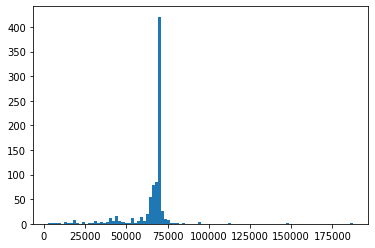

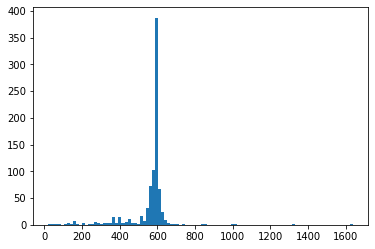

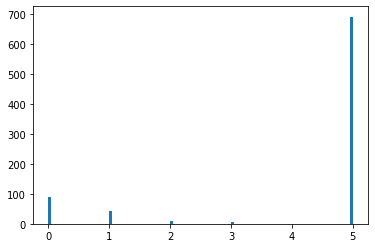

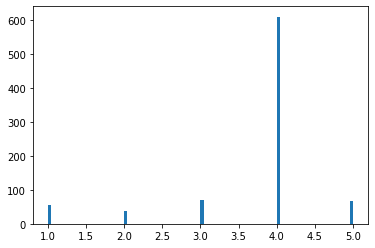

In [ ]:
import matplotlib.pyplot as plt

reviewed = ["grey" if "unreviewed" in entry["entryType"] else "gold" for entry in data["results"]]

mass = [entry["sequence"]["molWeight"] for entry in data["results"]]
plt.hist(mass, bins=100)
plt.show()

length = [entry["sequence"]["length"] for entry in data["results"]]
plt.hist(length, bins=100)
plt.show()

n_cat = [len(entry.get("comments", [])) for entry in data["results"]]
plt.hist(n_cat, bins=100)
plt.show()

score = [entry["annotationScore"] for entry in data["results"]]
plt.hist(score, bins=100)
plt.show()

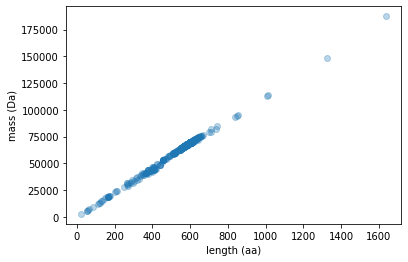

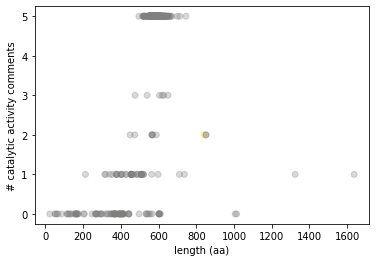

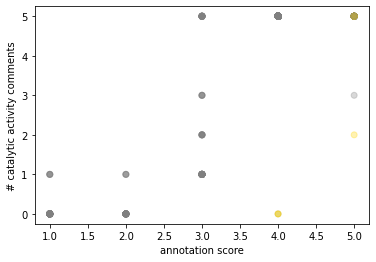

In [ ]:
plt.scatter(length, mass, alpha=0.3)
plt.xlabel("length (aa)")
plt.ylabel("mass (Da)")
plt.show()

plt.scatter(length, n_cat, c=reviewed, alpha=0.3)
plt.xlabel("length (aa)")
plt.ylabel("# catalytic activity comments")
plt.show()

plt.scatter(score, n_cat, c=reviewed, alpha=0.3)
plt.xlabel("annotation score")
plt.ylabel("# catalytic activity comments")
plt.show()